In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

print('Libraries Imported')

Libraries Imported


In [4]:
df1 = pd.read_csv("datasetprogram -without converting to no.csv")
df1.head()

,store_type,availability,location,rating,society,total_sqft,employees,Dpmo,programs
0,Drug Store,Ready To Move,Hoysalanagar,3,NaN,7650,1,88.0,3P
1,Super Market,19-Sep,Sarjapur Road,3,Prtates,25625,28,12.0,IHS
2,Drug Store,18-May,Ashwath Nagar,3,Prldsum,21250,1,97.0,Locker
3,Super Market,43879,Bisuvanahalli,3,Baanise,36275,35,79.0,Locker
4,Super Market,Ready To Move,Dasanapura,2,JRrnauv,32250,7,20.0,IHS


In [5]:
df1.shape 

(12949, 9)

In [6]:
df1.columns

Index(['store_type', 'availability', 'location', 'rating  ', 'society',
       'total_sqft', 'employees ', 'Dpmo', 'programs'],
      dtype='object')

In [7]:
df1['store_type'].unique()

array(['Drug Store', 'Super Market', 'General Store', 'store_type',
       'Gas Station'], dtype=object)

In [8]:
df1['store_type'].value_counts()

Super Market     8546
General Store    2348
Drug Store       1971
Gas Station        83
store_type          1
Name: store_type, dtype: int64

<h2 style="color: dark blue"> Data Cleaning : Drop features that are not required to build our model</h2> 

In [9]:
df2 = df1.drop(['store_type','society','availability'],axis='columns')
df2.shape

(12949, 6)

In [10]:
df2.isnull().sum()

location       1
rating        16
total_sqft     0
employees      0
Dpmo           4
programs       0
dtype: int64

In [11]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
rating        0
total_sqft    0
employees     0
Dpmo          0
programs      0
dtype: int64

In [12]:
df3.shape

(12928, 6)

In [13]:
df3['total_sqft'].unique()

array(['7650', '25625', '21250', ..., '63925', '35725', '148100'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,rating,total_sqft,employees,Dpmo,programs
37,Hosakerehalli,5,#VALUE!,27,54.0,Locker
76,Upadhyaya Layout,3,#VALUE!,44,29.0,IHS
120,Kadugodi,2,#VALUE!,21,45.0,Locker
147,Rachenahalli,2,#VALUE!,25,94.0,3P
150,Amruthnagar,2,#VALUE!,46,97.0,3P


In [16]:
df3['employees '].unique()

array([  1,  28,  35,   7,   9,  19,  48,  14,   4,   0,   2,  27,  32,
        47,   6,  23,  37,  46,  45,  42,  15,  20,   8,  34,  13,  18,
        16,   3,  43,  41,   5,  11,  10,  24,  26,  44,  17,  12,  31,
        39,  40,  25,  29,  21,  36,  33,  22,  30,  38,  49, 390],
      dtype=int64)

### Remove all the values that are not numeric from total_sqft 

In [17]:
df3.drop(df3[~df3['total_sqft'] .apply(is_float)].index, inplace = True)

C:\Users\Attri\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,rating,total_sqft,employees,Dpmo,programs


In [19]:
df3[~df3['employees '].apply(is_float)].head()

,location,rating,total_sqft,employees,Dpmo,programs


In [20]:
df1['rating  '].value_counts()

2       5380
3       4713
4       1375
1        625
5        348
6        217
7         99
8         86
9         53
10        14
1 RK      11
11         4
27         1
43         1
14         1
16         1
13         1
19         1
18         1
12         1
Name: rating  , dtype: int64

In [21]:
rating_stats = df3['rating  '].value_counts(ascending=False)
rating_stats

2       5277
3       4626
4       1350
1        611
5        340
6        212
7         99
8         85
9         52
10        14
1 RK      11
11         4
43         1
27         1
16         1
13         1
19         1
18         1
12         1
Name: rating  , dtype: int64

In [22]:
rating_stats_greater_than_5 = rating_stats[rating_stats<215]
rating_stats_greater_than_5

6       212
7        99
8        85
9        52
10       14
1 RK     11
11        4
43        1
27        1
16        1
13        1
19        1
18        1
12        1
Name: rating  , dtype: int64

In [23]:
 df3['rating  '] =  df3['rating  '].apply(lambda x: '5' if x in rating_stats_greater_than_5 else x)
len( df3['rating  '].unique())

C:\Users\Attri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


5

In [24]:
df1['rating  '].value_counts()

2       5380
3       4713
4       1375
1        625
5        348
6        217
7         99
8         86
9         53
10        14
1 RK      11
11         4
27         1
43         1
14         1
16         1
13         1
19         1
18         1
12         1
Name: rating  , dtype: int64

In [25]:
df3.head(10)

,location,rating,total_sqft,employees,Dpmo,programs
0,Hoysalanagar,3,7650,1,88.0,3P
1,Sarjapur Road,3,25625,28,12.0,IHS
2,Ashwath Nagar,3,21250,1,97.0,Locker
3,Bisuvanahalli,3,36275,35,79.0,Locker
4,Dasanapura,2,32250,7,20.0,IHS
5,Panathur,2,31750,9,12.0,3P
6,Raja Rajeshwari Nagar,2,27750,19,44.0,IHS
7,Bidrahalli,1,10836,48,72.0,Locker
8,Seegehalli,3,6750,14,1.0,3P
9,Hennur,2,58025,4,74.0,3P


In [26]:
rating_stats_greater_than_5

6       212
7        99
8        85
9        52
10       14
1 RK     11
11        4
43        1
27        1
16        1
13        1
19        1
18        1
12        1
Name: rating  , dtype: int64

<h2 style="color:blue"><h2 style="color: dark pink"> Feature Engineering</h2>

In [27]:
df3_stats = df3['total_sqft'].describe()
df3_stats

count     12688
unique     2573
top       12000
freq        505
Name: total_sqft, dtype: object

**Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations**

In [28]:
df3.location = df3.location.apply(lambda x: x.strip())
location_stats = df3['location'].value_counts(ascending=False)
location_stats

C:\Users\Attri\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Whitefield           512
Sarjapur  Road       377
Electronic City      290
Kanakpura Road       263
Thanisandra          227
                    ... 
Mailasandra            1
Vidhyanagar Cross      1
RK Colony              1
Yarandahalli           1
rr nagar               1
Name: location, Length: 1272, dtype: int64

#### Drop all the locations less than 10 and merge to a location other

In [29]:
len(location_stats[location_stats>10])

233

In [30]:
len(location_stats)

1272

In [31]:
len(location_stats[location_stats<=10])

1039

<h2 style="color:blue">Dimensionality Reduction</h2>

**Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns**

In [32]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Sector 1 HSR Layout    10
Ganga Nagar            10
Sadashiva Nagar        10
Narayanapura           10
Kodigehalli            10
                       ..
Mailasandra             1
Vidhyanagar Cross       1
RK Colony               1
Yarandahalli            1
rr nagar                1
Name: location, Length: 1039, dtype: int64

In [33]:
len(df3.location.unique())

1272

In [34]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3.location.unique())

234

In [35]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3.location.unique())

234

In [36]:
df3.head(10)

,location,rating,total_sqft,employees,Dpmo,programs
0,other,3,7650,1,88.0,3P
1,Sarjapur Road,3,25625,28,12.0,IHS
2,other,3,21250,1,97.0,Locker
3,Bisuvanahalli,3,36275,35,79.0,Locker
4,Dasanapura,2,32250,7,20.0,IHS
5,Panathur,2,31750,9,12.0,3P
6,Raja Rajeshwari Nagar,2,27750,19,44.0,IHS
7,other,1,10836,48,72.0,Locker
8,Seegehalli,3,6750,14,1.0,3P
9,Hennur,2,58025,4,74.0,3P


In [37]:
df3_stats = df3['total_sqft'].describe()
df3_stats

count     12688
unique     2573
top       12000
freq        505
Name: total_sqft, dtype: object

In [38]:
df4 = df3.copy()

In [39]:
df4['rating  '].unique()

array(['3', '2', '1', '5', '4'], dtype=object)

Text(0, 0.5, 'Count')

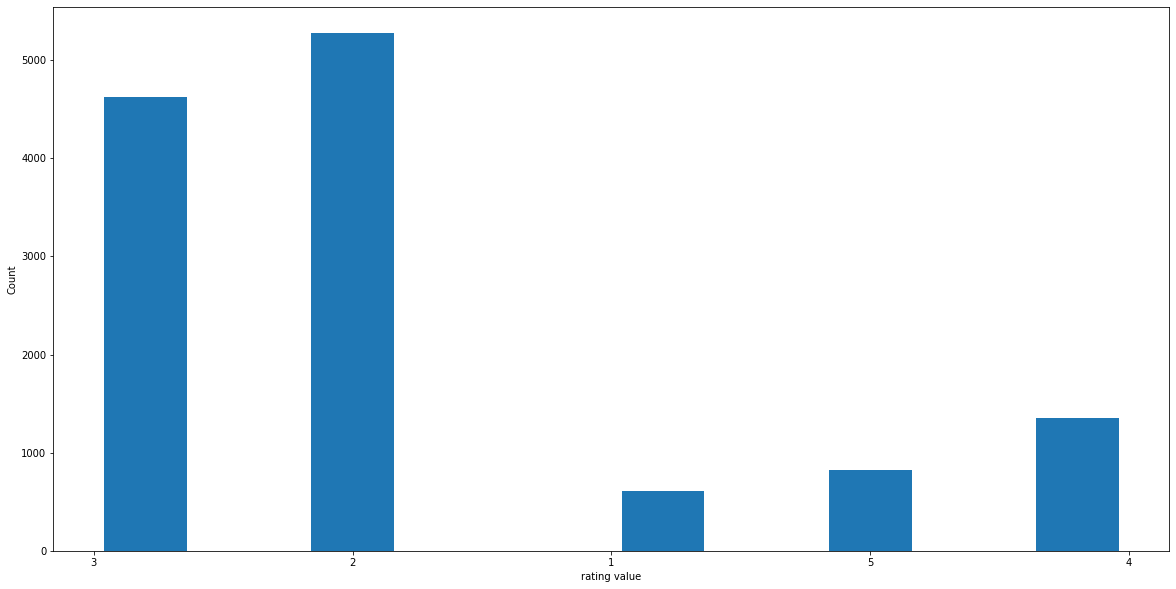

In [40]:
plt.hist(df4['rating  '],rwidth=0.8)
plt.xlabel("rating value")
plt.ylabel("Count")

<h2 style='color:pink'>Use One Hot Encoding For Location</h2>

<h3 style='color:'>ML algo doesn't work with char so do hot encoding to convert it into numerical</h2>

In [41]:
dummies = pd.get_dummies(df4.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
df4 = pd.concat([df4,dummies],axis='columns')
df4.head()

,location,rating,total_sqft,employees,Dpmo,programs,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,other,3,7650,1,88.0,3P,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Sarjapur Road,3,25625,28,12.0,IHS,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,other,3,21250,1,97.0,Locker,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Bisuvanahalli,3,36275,35,79.0,Locker,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dasanapura,2,32250,7,20.0,IHS,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df5 = df4.drop('location',axis='columns')
df5.head(2)

,rating,total_sqft,employees,Dpmo,programs,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,3,7650,1,88.0,3P,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,25625,28,12.0,IHS,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df5.columns

Index(['rating  ', 'total_sqft', 'employees ', 'Dpmo', 'programs',
       '1st Block Jayanagar', '1st Phase JP Nagar', '2nd Stage Nagarbhavi',
       '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=239)

<h2 style='color:pink'>Build a Model Now...</h2>

In [45]:
df5.shape

(12688, 239)

In [46]:
df5.columns

Index(['rating  ', 'total_sqft', 'employees ', 'Dpmo', 'programs',
       '1st Block Jayanagar', '1st Phase JP Nagar', '2nd Stage Nagarbhavi',
       '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=239)

<h2 style='color:blue'>We are basically converting species column values from['3P', 'IHS', 'Locker', 'Helix'] to [0,1,2,3]. This is an essential step as the scikit-learn's Random Forest can't predict text — it can only predict numbers..</h2>

In [47]:
#Creating the dependent variable class
factor = pd.factorize(df5['programs'])
df5.programs = factor[0]
definitions = factor[1]
print(df5.programs.head())
print(definitions)

0    0
1    1
2    2
3    2
4    1
Name: programs, dtype: int64
Index(['3P', 'IHS', 'Locker', 'Helix'], dtype='object')


In [48]:
df5.columns

Index(['rating  ', 'total_sqft', 'employees ', 'Dpmo', 'programs',
       '1st Block Jayanagar', '1st Phase JP Nagar', '2nd Stage Nagarbhavi',
       '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=239)

In [49]:
df5.head(5)

,rating,total_sqft,employees,Dpmo,programs,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,3,7650,1,88.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,25625,28,12.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,21250,1,97.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,36275,35,79.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,32250,7,20.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#Splitting the data into independent and dependent variables
X = df5.iloc[:,0:240].values
y = df5.iloc[:,4].values
print('The independent features set: ')
print(X[:5])
print('The dependent variable: ')
print(y[:5])

The independent features set: 
[['3' '7650' 1 ... 0 0 1]
 ['3' '25625' 28 ... 0 0 0]
 ['3' '21250' 1 ... 0 0 1]
 ['3' '36275' 35 ... 0 0 0]
 ['2' '32250' 7 ... 0 0 0]]
The dependent variable: 
[0 1 2 2 1]


In [51]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
print(X_test)
print(y_test)

[['3' '9540' 49 ... 0 0 1]
 ['2' '9000' 2 ... 0 0 0]
 ['2' '28525' 33 ... 0 0 0]
 ...
 ['3' '33875' 0 ... 0 0 0]
 ['3' '25200' 19 ... 0 0 1]
 ['2' '19000' 12 ... 0 0 0]]
[1 3 2 ... 2 1 2]


Feature Scaling
This is a very important step in machine learning. It helps the algorithm quickly learn a better solution to the problem.

We will use a standard scaler provided in the sklearn library. It subtracts the mean value of the observation and then divides it by the unit variance of the observation.
We will perform the following steps:

Define a scaler by calling the function from sklearn library.
Transform train feature dataset (X_train) and fit the scaler on train feature dataset.
Use the scaler to transform test feature dataset (X_test).

In [52]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

[[ 0.30207227  0.26454903 -0.24900811 ... -0.03440444 -0.08212608
  -0.53062761]
 [ 0.30207227  0.03243672 -0.64368302 ... -0.03440444 -0.08212608
  -0.53062761]
 [-0.76104616  0.14123937  1.92170387 ... -0.03440444 -0.08212608
  -0.53062761]
 ...
 [ 1.3651907   0.85135797 -1.16991623 ... -0.03440444 -0.08212608
  -0.53062761]
 [ 0.30207227 -0.2069291  -1.23569538 ... -0.03440444 -0.08212608
   1.88456083]
 [-0.76104616  0.28340816  0.86923746 ... -0.03440444 -0.08212608
  -0.53062761]]
[[ 0.30207227 -0.61921859  1.98748303 ... -0.03440444 -0.08212608
   1.88456083]
 [-0.76104616 -0.63488617 -1.10413707 ... -0.03440444 -0.08212608
  -0.53062761]
 [-0.76104616 -0.06838706  0.93501661 ... -0.03440444 -0.08212608
  -0.53062761]
 ...
 [ 0.30207227  0.08683805 -1.23569538 ... -0.03440444 -0.08212608
  -0.53062761]
 [ 0.30207227 -0.16485874  0.01410849 ... -0.03440444 -0.08212608
   1.88456083]
 [-0.76104616 -0.34474578 -0.44634556 ... -0.03440444 -0.08212608
  -0.53062761]]


. Training the model
We define the parameters for the random forest training as follows:

n_estimators: This is the number of trees in the random forest classification. We have defined 10 trees in our random forest.
criterion: This is the loss function used to measure the quality of the split. There are two available options in sklearn — gini and entropy. We have used entropy.
random_state: This is the seed used by the random state generator for randomizing the dataset.
Next, we use the training dataset (both dependent and independent to train the random forest)

In [53]:
# Fitting Random Forest Classification to the Training set
classifier =  RandomForestClassifier(max_depth=2, random_state=10)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.5760441292356187

 Evaluating the performance
Performance evaluation of the trained model consists of following steps:

Predicting the species class of the test data using test feature set (X_test). We will use the predict function of the random forest classifier to predict classes.
Converting the numeric classes of the predicted values and the test actual values into textual equivalent. This involves the following steps:
Creating dictionary for mapping tables from class to text — we use dict function along with zip to create the required dictionary.
Transforming the test-actual and test-predict database from numeric classes to textual classes.
Evaluating the performance of the classifier using Confusion Matrix

In [68]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Reverse factorize (converting y_pred from 0s,1s 2s 3s to  to'3P' 'IHS' 'Locker' 'Locker' 'IHS'
reversefactor = dict(zip(range(5),definitions))
print(reversefactor)
print(y_test)
#y_test = np.vectorize(reversefactor.get)(y_test)
#print(y_test)
#y_pred = np.vectorize(reversefactor.get)(y_pred)
# Making the Confusion Matrix 
print(pd.crosstab(y_test, y_pred, rownames=['Actual program'], colnames=['                      Predicted program']))

{0: '3P', 1: 'IHS', 2: 'Locker', 3: 'Helix'}
[1 3 2 ... 2 1 2]
                      Predicted program     1    2
Actual program                                    
0                                         250    0
1                                        1164    0
2                                         586  298
3                                         230   10


In [55]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(RandomForestClassifier() ,X_test, y_test, cv=cv)

array([1., 1., 1., 1., 1.])

In [56]:
df5.columns

Index(['rating  ', 'total_sqft', 'employees ', 'Dpmo', 'programs',
       '1st Block Jayanagar', '1st Phase JP Nagar', '2nd Stage Nagarbhavi',
       '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=239)

In [57]:
df5.head(5)

,rating,total_sqft,employees,Dpmo,programs,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,3,7650,1,88.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,25625,28,12.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,21250,1,97.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,36275,35,79.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,32250,7,20.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
def predict_program(location,rating,total_sqft,employees,Dpmo):    
    loc_index = np.where(df5.columns==location)[0][0]

    x = np.zeros(len(df5.columns))
    x[0] = rating
    x[1] = total_sqft
    x[2] = employees
    x[3] = Dpmo
    if loc_index >= 0:
        x[loc_index] = 1

    return classifier.predict([x])[0]

In [59]:
predict_program('Bisuvanahalli', 4, 3000, 300000, 1000)

1

In [64]:
import pickle
with open('new_program_prediction.pickle','wb') as f:
    pickle.dump(classifier,f)

In [65]:
with open('new_program_prediction.pickle','rb') as f:
    mp=pickle.load(f)

In [66]:
import json
columns = {
    'data_columns' : [col.lower() for col in df5.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))